# Exploración de Datos
## Importar librerías

Matplotlib y seaborn nos ayudarán a graficar nuestros datos

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Carga de Dataset

In [ ]:
df_partidos = pd.read_csv("/content/partidos_premier.csv")

# Mostrar primeras filas
df_partidos.head(6)

,fecha_partido,equipo_local,equipo_visitante,goles_local,goles_visitante,posesion_local (%),posesion_visitante (%),tiros_arco_local,tiros_arco_visitante,estadio
0,2023-01-01,Sheffield United,Manchester United,2,0,54,46,12,6,Bramall Lane
1,2023-01-08,Liverpool,Sheffield United,1,5,60,40,12,3,Anfield
2,2023-01-15,Manchester United,Brentford,1,0,55,45,10,7,Old Trafford
3,2023-01-22,Sheffield United,Brentford,2,3,57,43,3,3,Bramall Lane
4,2023-01-29,Brentford,Manchester United,5,3,52,48,7,12,Gtech Community Stadium
5,2023-02-05,Brentford,Manchester United,3,3,60,40,8,11,Gtech Community Stadium


## Estadísticas descriptivas generales
Permite tener información estadistica, como una primera vista a los datos


In [ ]:
df_partidos.describe()

,goles_local,goles_visitante,posesion_local (%),posesion_visitante (%),tiros_arco_local,tiros_arco_visitante
count,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2.63000,2.540000,50.250000,49.750000,7.580000,7.870000
std,1.58691,1.788967,6.035878,6.035878,2.899599,2.966667
min,0.00000,0.000000,40.000000,40.000000,3.000000,3.000000
25%,1.00000,1.000000,45.000000,44.750000,5.000000,5.000000
50%,3.00000,3.000000,51.000000,49.000000,7.500000,8.000000
75%,4.00000,4.000000,55.250000,55.000000,10.000000,11.000000
max,5.00000,5.000000,60.000000,60.000000,12.000000,12.000000


## Promedio goles Liverpool como local y visitante


In [ ]:
goles_local_lv = df_partidos[df_partidos['equipo_local'] == 'Liverpool']['goles_local'].mean()
goles_visitante_lv  = df_partidos[df_partidos['equipo_visitante'] == 'Liverpool']['goles_visitante'].mean()

print("Goles promedio Liverpool como local:", goles_local_lv )
print("Goles promedio Liverpool como visitante:", goles_visitante_lv )

Goles promedio Cebollitas FC como local: 2.5384615384615383
Goles promedio Cebollitas FC como visitante: 3.28


## Histogramas de Goles  de local como y visitantes

<p>
Los histogramas son herramientas visuales clave en el análisis de datos para representar la distribución de frecuencias de una variable numérica. Permiten visualizar la forma en que los datos se agrupan, identificar tendencias, patrones y valores atípicos, y comprender la distribución general de un conjunto de datos.
</p>

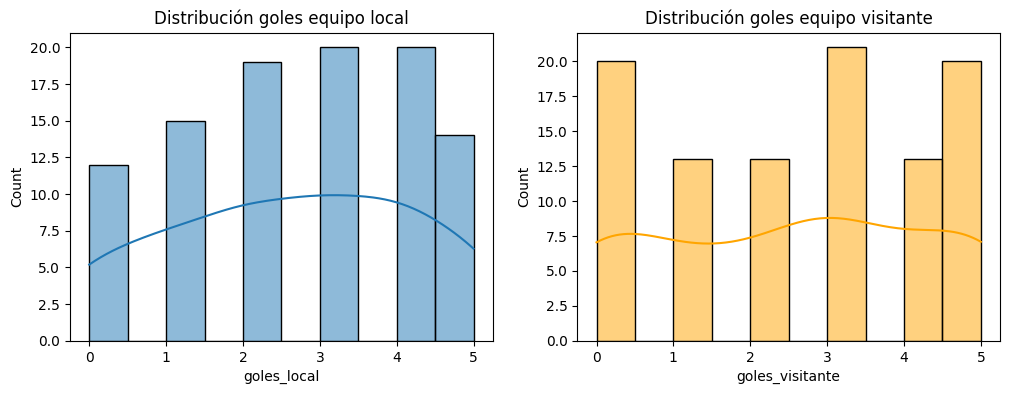

In [ ]:
# Histogramas de goles marcados (local y visitante)
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df_partidos['goles_local'], kde=True, ax=ax[0], bins=10)
ax[0].set_title('Distribución goles equipo local')

sns.histplot(df_partidos['goles_visitante'], kde=True, ax=ax[1], bins=10, color='orange')
ax[1].set_title('Distribución goles equipo visitante')

plt.show()

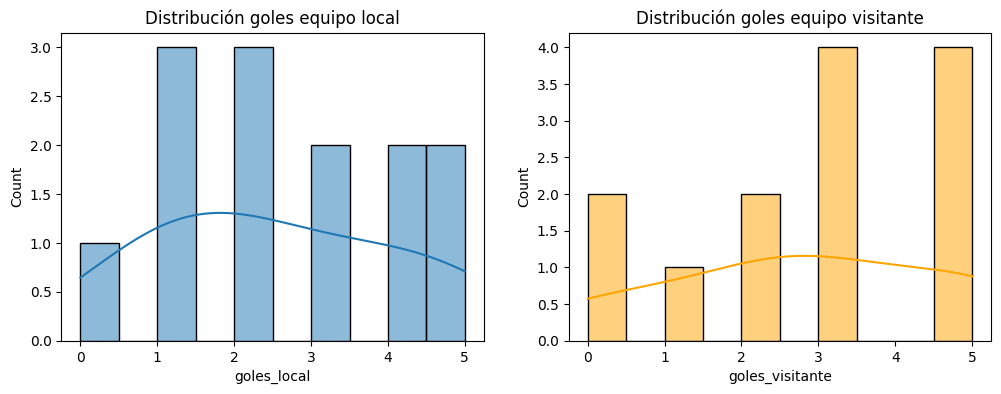

In [ ]:
# Histogramas de goles marcados (local y visitante Liverpool)
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
df_lv = df_partidos[df_partidos['equipo_local'] == 'Liverpool']
sns.histplot(df_lv['goles_local'], kde=True, ax=ax[0], bins=10)
ax[0].set_title('Distribución goles equipo local')

sns.histplot(df_lv['goles_visitante'], kde=True, ax=ax[1], bins=10, color='orange')
ax[1].set_title('Distribución goles equipo visitante')

plt.show()

## Diagrama de Caja o Boxplot de los goles
<p>
 son herramientas visuales en el análisis de datos que permiten resumir y comparar la distribución de un conjunto de datos numéricos. Sirven para identificar la mediana, cuartiles, rango intercuartílico, valores atípicos y la simetría de la distribución.
</p>
En este caso vamos a detectar partidos fuera de lo normal goleadas derrotas

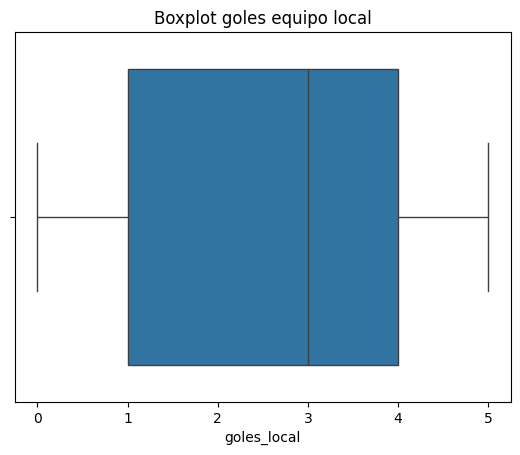

In [ ]:
# Boxplot para goles del equipo local general
sns.boxplot(x=df_partidos['goles_local'])
plt.title('Boxplot goles equipo local')
plt.show()

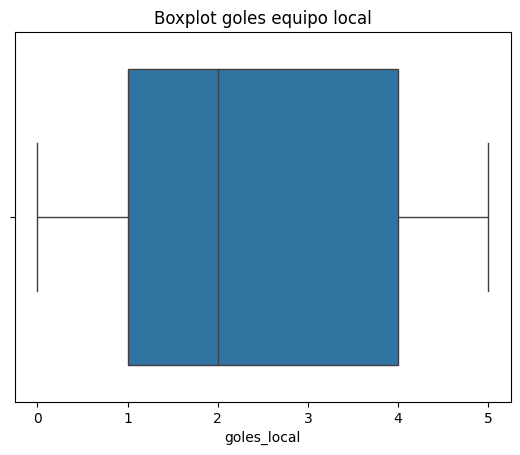

In [ ]:
# Boxplot para goles del equipo local Liverpool
sns.boxplot(x=df_lv['goles_local'])
plt.title('Boxplot goles equipo local')
plt.show()

## Diagramas de dispersón
Son herramientas visuales esenciales en el análisis de datos para identificar patrones, tendencias y relaciones entre dos variables numéricas. Sirven para revelar correlaciones, ya sean positivas (ambas variables aumentan juntas), negativas (una variable aumenta mientras la otra disminuye), o ninguna correlación (no hay relación aparente). Además, permiten detectar valores atípicos (outliers) en los datos.

En este caso se hace el analisis de posesión vs goles marcados (local)

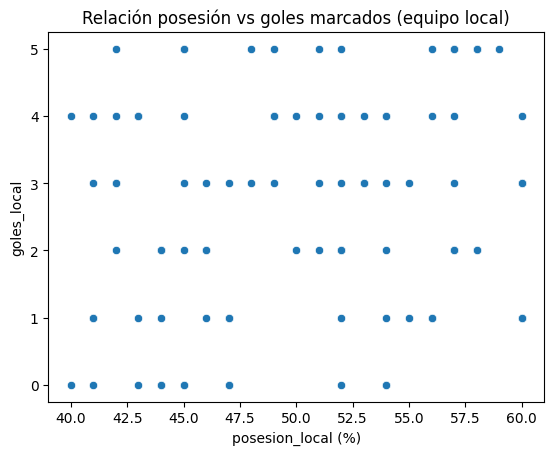

In [ ]:
# Scatterplot de posesión vs goles marcados (local) GENERAL
sns.scatterplot(x='posesion_local (%)', y='goles_local', data=df_partidos)
plt.title('Relación posesión vs goles marcados (equipo local)')
plt.show()

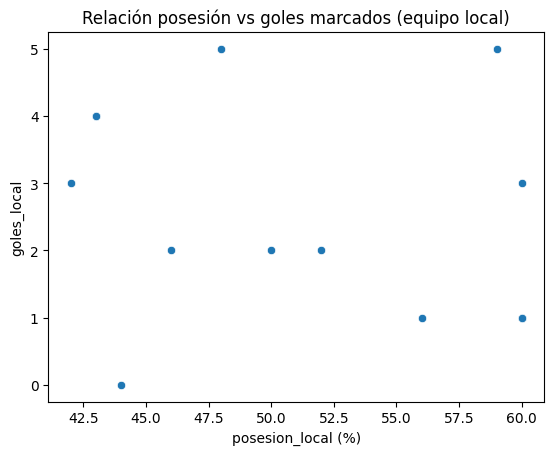

In [ ]:
# Scatterplot de posesión vs goles marcados (local) Liverpool
sns.scatterplot(x='posesion_local (%)', y='goles_local', data=df_lv)
plt.title('Relación posesión vs goles marcados (equipo local)')
plt.show()

## Heatmap o mapa de calor de correlaciones
<p>
es una representación visual de la correlación entre múltiples variables en un conjunto de datos. Utiliza una matriz codificada por colores para mostrar la fuerza y la dirección de las relaciones entre pares de variables, donde los colores más intensos indican correlaciones más fuertes y los colores más claros, correlaciones más débiles o inexistentes.
</p>

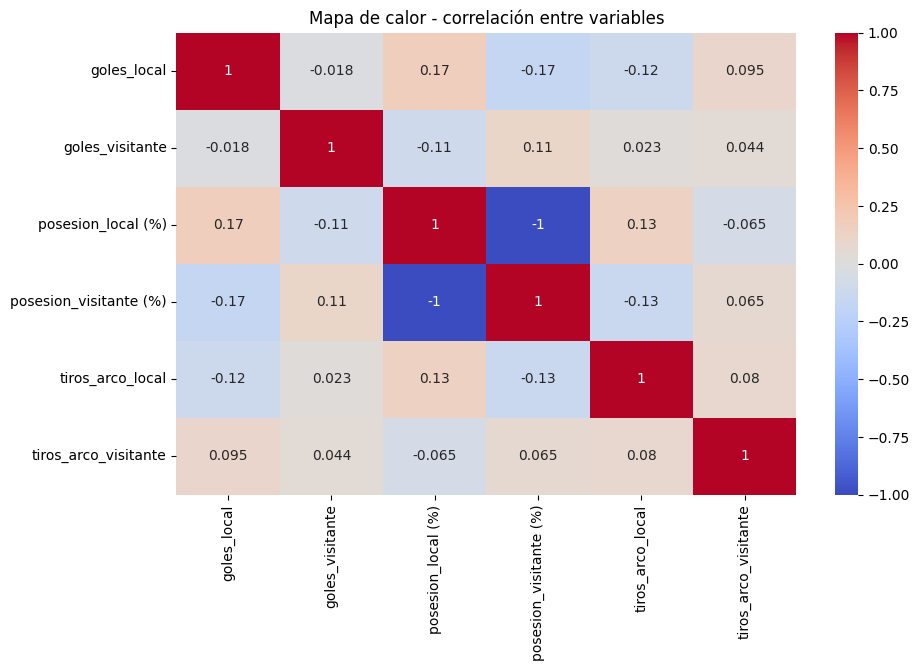

In [ ]:
# Mapa de calor para correlación entre variables clave General
plt.figure(figsize=(10,6))
sns.heatmap(df_partidos[['goles_local', 'goles_visitante', 'posesion_local (%)',
                         'posesion_visitante (%)', 'tiros_arco_local',
                         'tiros_arco_visitante']].corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de calor - correlación entre variables')
plt.show()

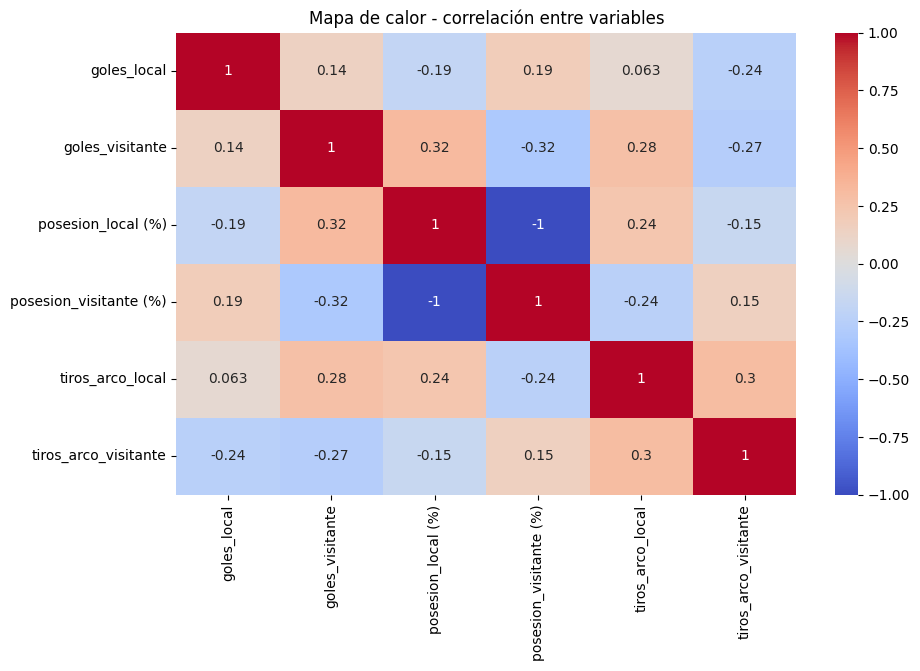

In [ ]:
# Mapa de calor para correlación entre variables clave General
plt.figure(figsize=(10,6))
sns.heatmap(df_lv[['goles_local', 'goles_visitante', 'posesion_local (%)',
                         'posesion_visitante (%)', 'tiros_arco_local',
                         'tiros_arco_visitante']].corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de calor - correlación entre variables')
plt.show()

# Data Scaling o Escalado de Datos
El escalado de datos es una técnica para transformar los datos numéricos a una escala común. Esto es importante porque muchos algoritmos (como regresión logística, k-NN, SVM, redes neuronales, etc.) funcionan mejor cuando los datos están en rangos similares.

Por ejemplo, si tienes dos variables:

Edad: de 0 a 100

Ingreso: de 0 a 100,000

El modelo puede darle más importancia a "Ingreso" solo porque tiene números más grandes, no porque sea más importante.


## Normalización a tiros al arco  (aprox. 0-15 tiros)
### Min-Max Scaling (Escalado Min-Max)
Transforma los datos para que todos estén entre un rango fijo, normalmente de 0 a 1.

✅ Ventajas:
Muy útil cuando necesitas que todos los datos estén entre 0 y 1.

Bueno para algoritmos basados en distancias (k-NN, redes neuronales).

⚠️ Desventajas:
Muy sensible a valores atípicos (outliers). Si hay un número muy grande o muy pequeño, puede distorsionar todo el escalado.

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
scaler_norm = MinMaxScaler()

df_partidos['tiros_arco_local_norm'] = scaler_norm.fit_transform(df_partidos[['tiros_arco_local']])
df_partidos['tiros_arco_visitante_norm'] = scaler_norm.fit_transform(df_partidos[['tiros_arco_visitante']])

# Ver resultados
print(df_partidos[['tiros_arco_local','tiros_arco_local_norm']].head(20))
print(df_partidos[['tiros_arco_visitante','tiros_arco_visitante_norm']].head(20))

    tiros_arco_local  tiros_arco_local_norm
0                 12               1.000000
1                 12               1.000000
2                 10               0.777778
3                  3               0.000000
4                  7               0.444444
5                  8               0.555556
6                  4               0.111111
7                  5               0.222222
8                  9               0.666667
9                 10               0.777778
10                 5               0.222222
11                 4               0.111111
12                10               0.777778
13                 6               0.333333
14                 6               0.333333
15                11               0.888889
16                11               0.888889
17                10               0.777778
18                 6               0.333333
19                10               0.777778
    tiros_arco_visitante  tiros_arco_visitante_norm
0                      6

## Aplicar Estandarización a la posesión (%)

Transforma los datos para que tengan media 0 y desviación estándar 1. Es decir, los convierte a una distribución normal estándar (también se llama Z-score scaling).


✅ Ventajas:
Bueno cuando los datos tienen una distribución normal.

Menos afectado por outliers que Min-Max.

⚠️ Desventajas:
Si los datos no tienen una forma de campana (no normal), el resultado puede no tener mucho sentido.

In [ ]:
scaler_std = StandardScaler()

df_partidos['posesion_local_std'] = scaler_std.fit_transform(df_partidos[['posesion_local (%)']])
df_partidos['posesion_visitante_std'] = scaler_std.fit_transform(df_partidos[['posesion_visitante (%)']])

# Ver resultados
print(df_partidos[['posesion_local (%)','posesion_local_std']].head(20))
print(df_partidos[['posesion_visitante (%)','posesion_visitante_std']].head(20))

    posesion_local (%)  posesion_local_std
0                   54            0.624415
1                   60            1.623479
2                   55            0.790926
3                   57            1.123947
4                   52            0.291394
5                   60            1.623479
6                   49           -0.208138
7                   56            0.957436
8                   60            1.623479
9                   43           -1.207202
10                  48           -0.374649
11                  49           -0.208138
12                  56            0.957436
13                  47           -0.541160
14                  52            0.291394
15                  47           -0.541160
16                  52            0.291394
17                  45           -0.874181
18                  42           -1.373713
19                  57            1.123947
    posesion_visitante (%)  posesion_visitante_std
0                       46               -0.62

### Gracficas de Normalización y Estandarización

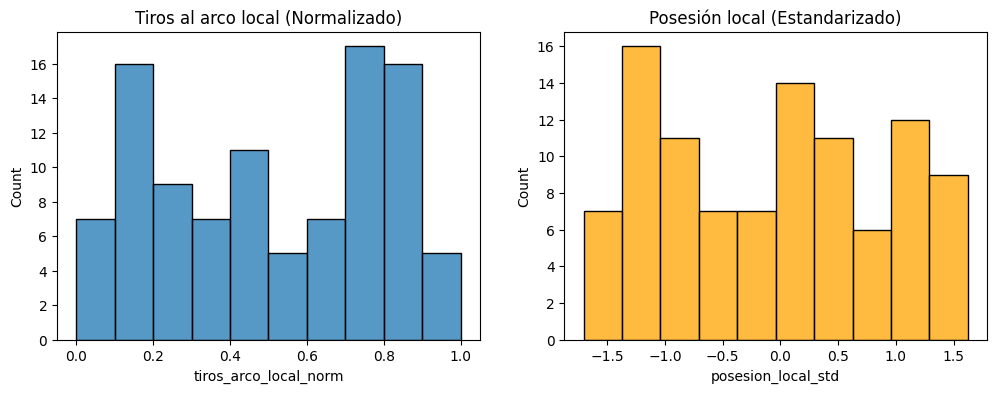

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))

# Visualizar tiros al arco (Normalización)
sns.histplot(df_partidos['tiros_arco_local_norm'], bins=10, ax=ax[0])
ax[0].set_title("Tiros al arco local (Normalizado)")

# Visualizar posesión local (Estandarización)
sns.histplot(df_partidos['posesion_local_std'], bins=10, ax=ax[1], color='orange')
ax[1].set_title("Posesión local (Estandarizado)")

plt.show()